In [1]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import json
from PIL import Image
import re
from io import BytesIO
import re
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tw_master_df =pd.read_csv('twitter_archive_master.csv')
img_df = pd.read_csv('image_predictions_new.csv')

In [3]:
tw_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,7711,32467
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,3128,20771
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,NaN,doggo,5669,28031
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,3628,20730
4,871102520638267392,2017-06-03 20:33:19+00:00,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,NaN,doggo,5764,21461


In [4]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Sources where the fans post:

In [5]:
tw_master_df.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

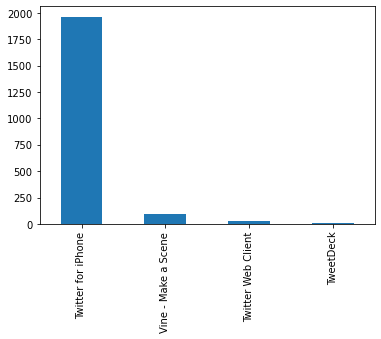

In [6]:
tw_master_df.source.value_counts().plot(kind = 'bar');

## Most predicted breeds:

In [7]:
most_breed_1 = img_df.query('p1_dog == True')
most_breed_2 = img_df.query('p2_dog == True')
most_breed_3 = img_df.query('p3_dog == True')

#### Most predicted breeds as first prediction

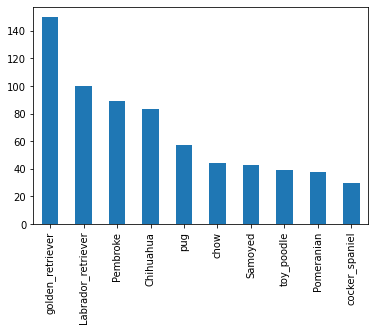

In [8]:
most_breed_1.p1.value_counts()[:10].plot(kind = 'bar');

#### Most predicted breeds as second prediction

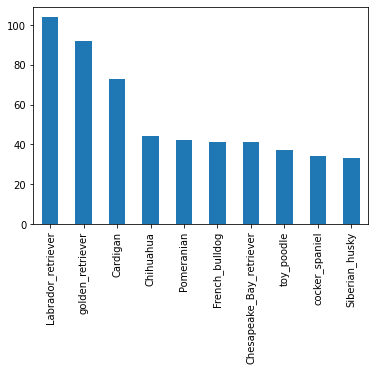

In [9]:
most_breed_2.p2.value_counts()[:10].plot(kind = 'bar');

#### Most predicted breeds as second prediction

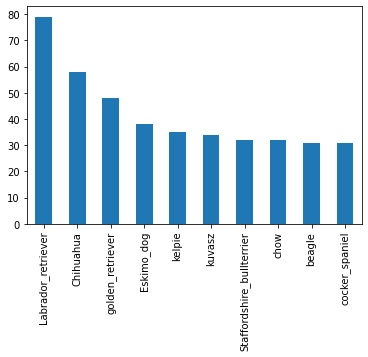

In [10]:
most_breed_3.p3.value_counts()[:10].plot(kind = 'bar');

## Most frequent dog names:

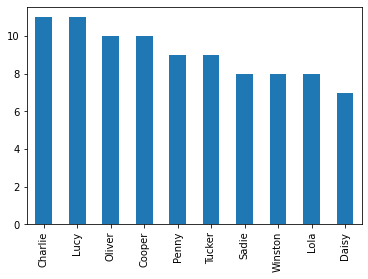

In [11]:
tw_master_df.name.value_counts()[:10].plot(kind = 'bar');

## Distribution of dog ratings:

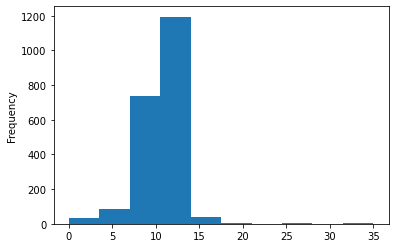

In [13]:
tw_master_df.rating_numerator.plot(kind = 'hist');